In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7650f12deb2595495f603adb12e81d28


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fengrun
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | zunheboto
Processing Record 5 of Set 1 | sorland
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | kemijarvi
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | zhigalovo
Processing Record 14 of Set 1 | uribia
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | norman wells
Proc

Processing Record 38 of Set 4 | iguguno
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | ampanihy
Processing Record 41 of Set 4 | ban nahin
Processing Record 42 of Set 4 | aguadilla
Processing Record 43 of Set 4 | nhulunbuy
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | palaikastron
Processing Record 46 of Set 4 | letnyaya stavka
Processing Record 47 of Set 4 | moctezuma
Processing Record 48 of Set 4 | biltine
Processing Record 49 of Set 4 | teguise
Processing Record 50 of Set 4 | itoman
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | jefferson city
Processing Record 3 of Set 5 | barrow
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | goianesia
Processing Record 6 of Set 5 | mezen
Processing Record 7 of Set 5 | waipawa
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | porto novo
Processing Record 10 of Set 5 | grand-lahou
Processing Record 11 of Set 5 | abu samrah

Processing Record 28 of Set 8 | keetmanshoop
Processing Record 29 of Set 8 | hofn
Processing Record 30 of Set 8 | torrington
Processing Record 31 of Set 8 | aitape
Processing Record 32 of Set 8 | moerai
Processing Record 33 of Set 8 | mogadouro
Processing Record 34 of Set 8 | marzuq
Processing Record 35 of Set 8 | fort nelson
Processing Record 36 of Set 8 | takoradi
Processing Record 37 of Set 8 | menongue
Processing Record 38 of Set 8 | manicore
Processing Record 39 of Set 8 | nuoro
Processing Record 40 of Set 8 | athens
Processing Record 41 of Set 8 | kudat
Processing Record 42 of Set 8 | komsomolskiy
Processing Record 43 of Set 8 | kharitonovo
Processing Record 44 of Set 8 | xuddur
Processing Record 45 of Set 8 | whitehorse
Processing Record 46 of Set 8 | ponta delgada
Processing Record 47 of Set 8 | kang
Processing Record 48 of Set 8 | pacific grove
Processing Record 49 of Set 8 | saleaula
City not found. Skipping...
Processing Record 50 of Set 8 | umzimvubu
City not found. Skippin

Processing Record 17 of Set 12 | haines junction
Processing Record 18 of Set 12 | apatity
Processing Record 19 of Set 12 | leningradskiy
Processing Record 20 of Set 12 | sakaiminato
Processing Record 21 of Set 12 | hovd
Processing Record 22 of Set 12 | loandjili
Processing Record 23 of Set 12 | stornoway
Processing Record 24 of Set 12 | hasanabad
Processing Record 25 of Set 12 | arcata
Processing Record 26 of Set 12 | rothes
Processing Record 27 of Set 12 | bud
Processing Record 28 of Set 12 | sept-iles
Processing Record 29 of Set 12 | eha amufu
Processing Record 30 of Set 12 | ulladulla
Processing Record 31 of Set 12 | dawson creek
Processing Record 32 of Set 12 | akhty
Processing Record 33 of Set 12 | sioux lookout
Processing Record 34 of Set 12 | gangotri
City not found. Skipping...
Processing Record 35 of Set 12 | sola
Processing Record 36 of Set 12 | jiaozuo
Processing Record 37 of Set 12 | balasheyka
Processing Record 38 of Set 12 | vostok
Processing Record 39 of Set 12 | barabai

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fengrun,39.83,118.12,51.28,35,0,16.20,CN,2020-10-22 01:05:09
1,Vardo,70.37,31.11,33.42,89,52,7.99,NO,2020-10-22 01:04:45
2,Bredasdorp,-34.53,20.04,55.40,87,0,2.24,ZA,2020-10-22 01:09:33
3,Zunheboto,25.97,94.52,60.78,100,50,2.93,IN,2020-10-22 01:09:33
4,Sorland,67.67,12.69,38.26,73,81,12.68,NO,2020-10-22 01:09:34
5,Souillac,-20.52,57.52,73.40,83,20,12.75,MU,2020-10-22 01:09:34
6,Kemijarvi,66.71,27.43,29.05,98,100,11.43,FI,2020-10-22 01:09:35
7,Hermanus,-34.42,19.23,52.00,95,0,8.23,ZA,2020-10-22 01:09:35
8,Hithadhoo,-0.60,73.08,82.56,74,8,13.31,MV,2020-10-22 01:09:35
9,Hilo,19.73,-155.09,84.20,54,1,9.17,US,2020-10-22 01:09:36


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fengrun,CN,2020-10-22 01:05:09,39.83,118.12,51.28,35,0,16.20
1,Vardo,NO,2020-10-22 01:04:45,70.37,31.11,33.42,89,52,7.99
2,Bredasdorp,ZA,2020-10-22 01:09:33,-34.53,20.04,55.40,87,0,2.24
3,Zunheboto,IN,2020-10-22 01:09:33,25.97,94.52,60.78,100,50,2.93
4,Sorland,NO,2020-10-22 01:09:34,67.67,12.69,38.26,73,81,12.68


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603329161.17771

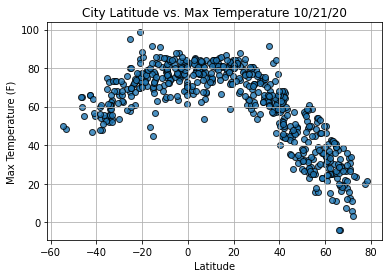

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

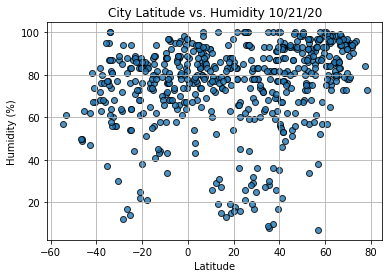

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

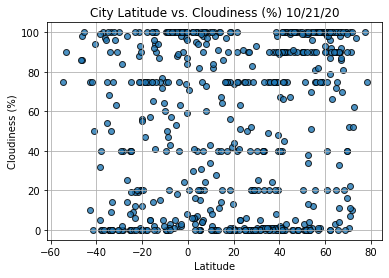

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

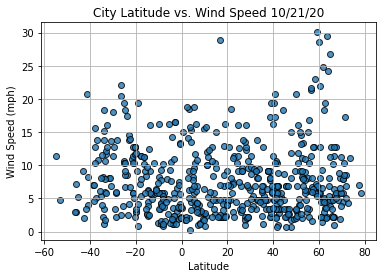

In [79]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [93]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [94]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [95]:
index13 = city_data_df.loc[13]
index13

City                         Faya
Country                        SA
Date          2020-10-22 01:07:24
Lat                         18.39
Lng                         42.45
Max Temp                       59
Humidity                       19
Cloudiness                     56
Wind Speed                    4.7
Name: 13, dtype: object

In [96]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fengrun,CN,2020-10-22 01:05:09,39.83,118.12,51.28,35,0,16.20
1,Vardo,NO,2020-10-22 01:04:45,70.37,31.11,33.42,89,52,7.99
3,Zunheboto,IN,2020-10-22 01:09:33,25.97,94.52,60.78,100,50,2.93
4,Sorland,NO,2020-10-22 01:09:34,67.67,12.69,38.26,73,81,12.68
6,Kemijarvi,FI,2020-10-22 01:09:35,66.71,27.43,29.05,98,100,11.43


In [97]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

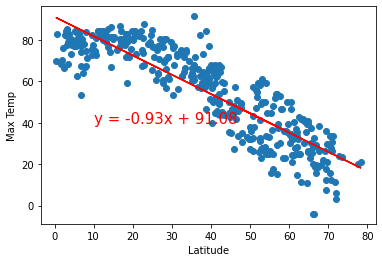

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere /n for Maximum Temperature', 'Max Temp',(10,40))


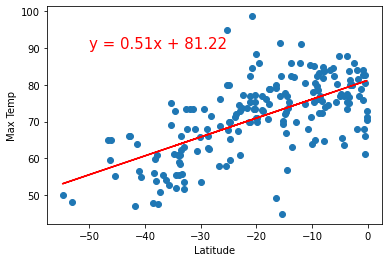

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


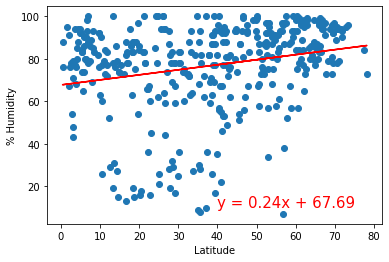

In [116]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

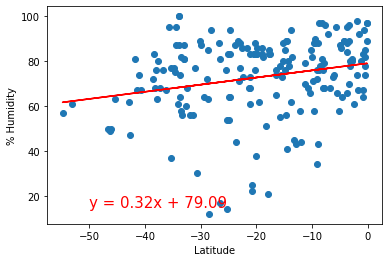

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

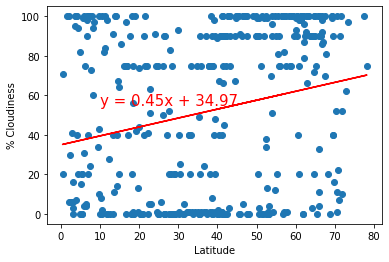

In [119]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Norther Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))


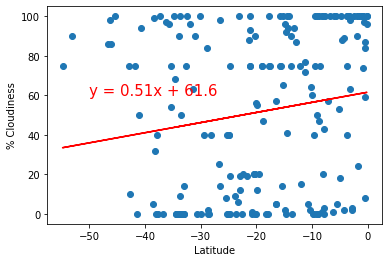

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


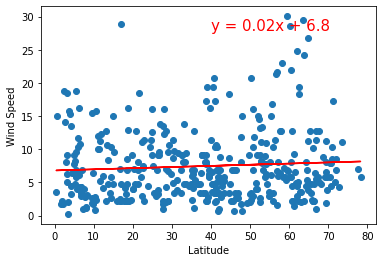

In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,28))


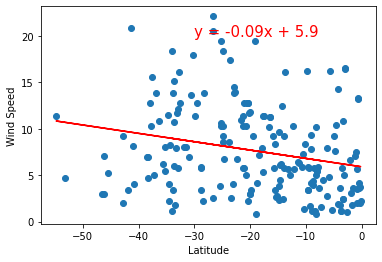

In [132]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,20))